In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import dotenv_values,load_dotenv


In [14]:
ENV = dotenv_values(".env")
load_dotenv(override=False)


True

In [4]:
#Cargar el dataset
df = pd.read_csv(os.environ['DATASETS_PATH']+'/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
#convertir valores 
labels = []
for value in df['Species']:
    if value == 'Iris-setosa':
        labels.append(0)
    elif value == 'Iris-versicolor':
        labels.append(1)
    else:
        labels.append(2)
df.loc[:, 'target'] = labels

df

    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [8]:
col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
#debe ser formato numpy array
X = df[col_names]
X = X.values
print(type(X))
#debe ser formato list
y = df.target
y = y.values.tolist()
print(type(y))

<class 'numpy.ndarray'>
<class 'list'>


In [23]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Analisis Univariado

In [81]:
df_describe = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_describe.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 + mean = Media es el promedio de los datos
 + std = La desviación estándar mide la dispersión de una distribución de datos
 + 25% = El primer cuartil Q1, es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
 + 50% = El segundo cuartil Q2 es el valor por debajo del cual queda el 50% de los datos (Mediana)
 + 75% =el tercer cuartil Q3 es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
 + MAX y Min : valores mayor y menor 

# Longitud del sépalo [cm]

Curva de densidad: 

    + Una curva de densidad es una curva en un gráfico que representa la distribución de valores en un conjunto de datos.
    + Es particularmente útil para visualizar la «forma» de una distribución, incluido si una distribución tiene o no uno o más «picos» de valores que ocurren con frecuencia y si la distribución está sesgada o no hacia la izquierda o hacia la derecha .

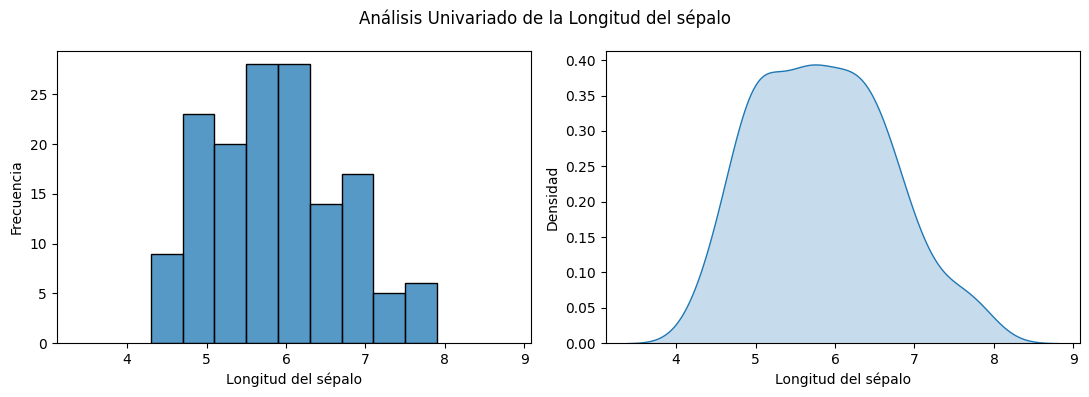

In [82]:
#Longitud del sépalo [cm]

var = 'SepalLengthCm'
var_title = 'Longitud del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()



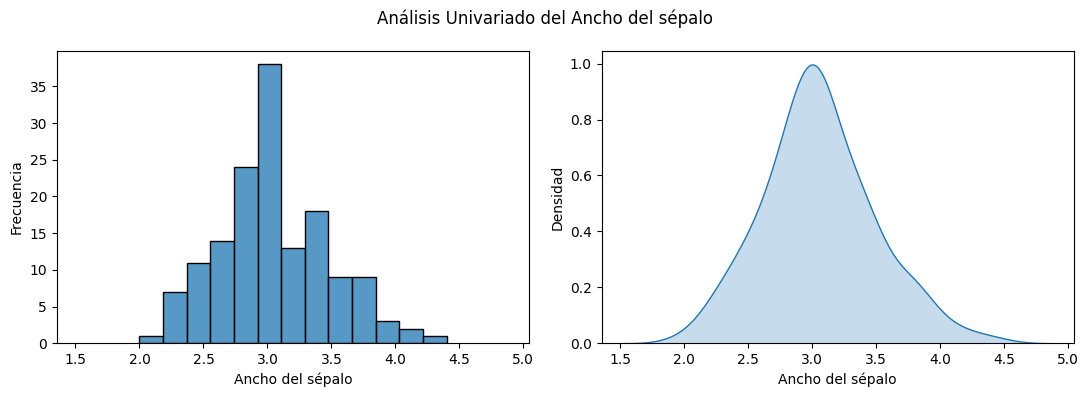

In [83]:
#Ancho del sépalo [cm]
var = 'SepalWidthCm'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado del ' + var_title)

plt.tight_layout()

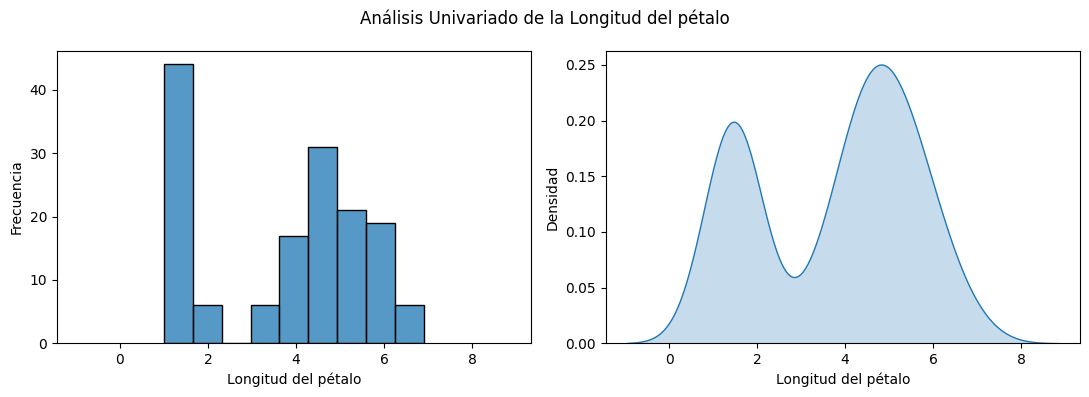

In [85]:
#Longitud del pétalo [cm]
var = 'PetalLengthCm'
var_title = 'Longitud del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

#Distribución bimodal

* Tiene dos picos de datos, lo que generalmente indica que tiene dos grupos diferentes. 

# Analisis Multivariado

# Longitud del Sépalo vs Especies:

La longitud del sépalo puede ser una característica interesante para clasificar las diferentes especies:


 + La longitud del sépalo de las flores de Iris-setosa es principalmente menor que la longitud del pétalo de las otras dos especies
 + La diferencia es menos clara entre Iris-versicolor e Iris-virginica.


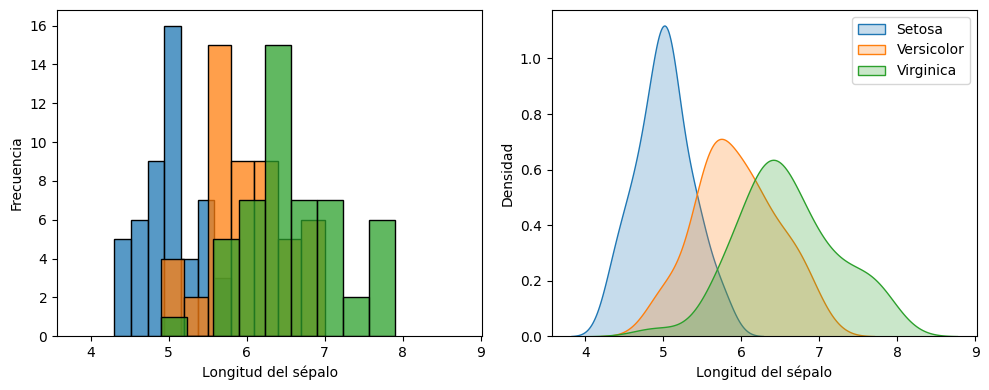

In [11]:
#Longitud del Sépalo vs Especies
var = 'SepalLengthCm'
var_title = 'Longitud del sépalo'

filter = df['Species'] == 'Iris-setosa'
df_setosa = df.loc[filter]

filter = (df['Species'] == 'Iris-versicolor')
df_versicolor = df.loc[filter]

filter = (df['Species'] == 'Iris-virginica')
df_virginica = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

#  Ancho del Sépalo vs Especies:

La anchura del sépalo parece ser la característica menos útil para clasificar las diferentes especies.

 + La anchura del sépalo de setosa parece ser mayor que las demás especies, pero en muchas muestras esta diferencia de tamaño no es cierta.
 + La anchura del sépalo entre virginica e setosa es bastante similar

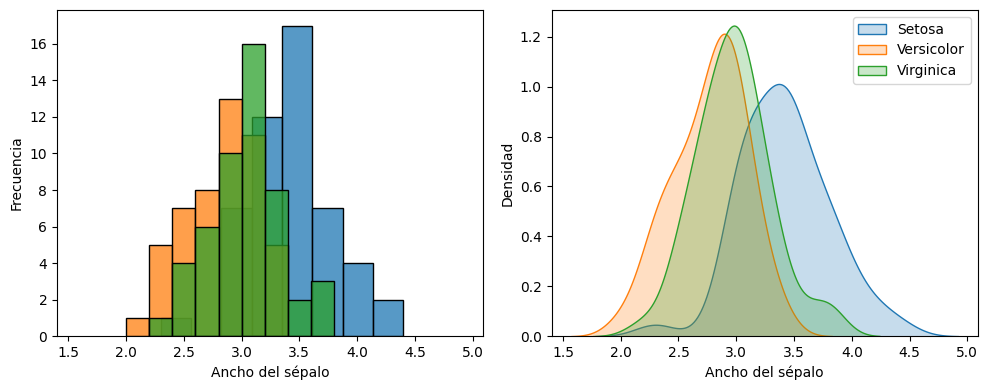

In [16]:
var = 'SepalWidthCm'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Longitud del Pétalo vs Especies

La longitud de los pétalos parece ser una característica importante en la clasificación de las diferentes especies:

 + La longitud de los pétalos de las flores de setosa es claramente inferior a la de las otras dos especies
 + Aunque la diferencia de longitud de los pétalos es menos clara entre versicolor e virginica, la longitud de las flores versicolor es principalmente menor que las de virginica

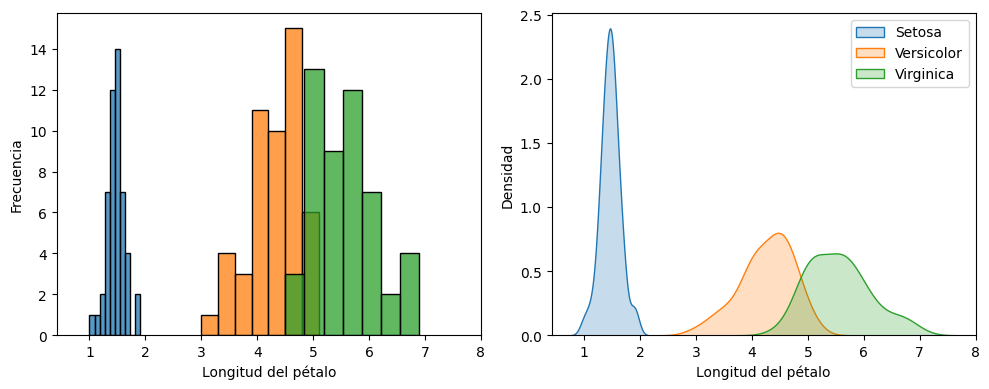

In [17]:
var = 'PetalLengthCm'
var_title = 'Longitud del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Ancho del Pétalo vs Especies

El ancho de los pétalos también puede ser una característica útil en la clasificación de las especies.

    + La longitud de los pétalos de las flores de setosa es claramente inferior a las demás especies.
    + Aunque la diferencia es menor entre versicolor e virginica, la longitud de las flores versicolor en su mayoria es inferior a las de virginica
    
Nota: En función del ancho de los pétalos, la setosa es facilmente separable, mientras que algunas porciones de la distribución de versicolor y virginica estan mezcladas.

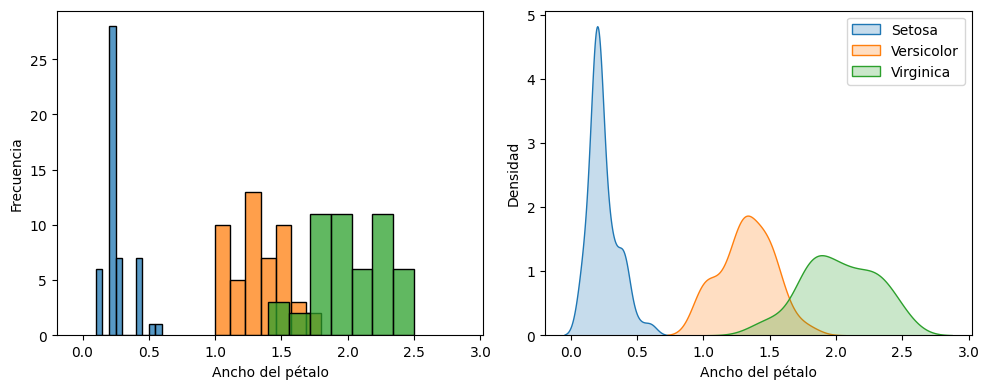

In [98]:
var = 'PetalWidthCm'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Longitud vs Ancho del Sépalo

Al graficar la longitud vs el ancho de sépalo se puede observar lo siguiente:

 + La especie setosa tiende a tener un ancho mayor y una longitud inferior que las demás
 + Muchas flores versicolor también tienen una longitud pequeña en su sepalo. Mientras que las flores virginica tienden a ser mayores
 + Las flores setosa tienen una variabilidad mayor en el ancho que las demás especies.

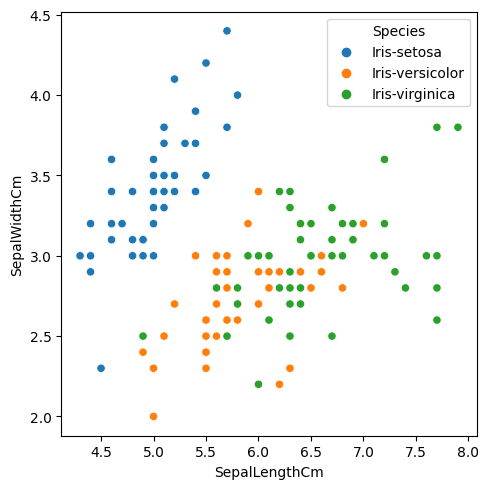

In [102]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", ax=ax, hue="Species")
plt.tight_layout()

# Longitud vs Ancho del Pétalo

La longitud de los pétalos y la anchura de los pétalos son características muy útiles que indican claramente muchas cosas.
 + Tienden a una relación positiva, lo que significa que si uno aumenta, el otro valor también aumenta.
 + Las dimensiones de los pétalos son evidentemente más pequeños para setosa, tanto en ancho como en longitud.
 + La especie setosa esta claramente agrupada
 + Las flores versicolor son más pequeñas que las flores verginica, aunque en este caso la línea divisoria entre estas especies es un poco más imprecisa. 

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

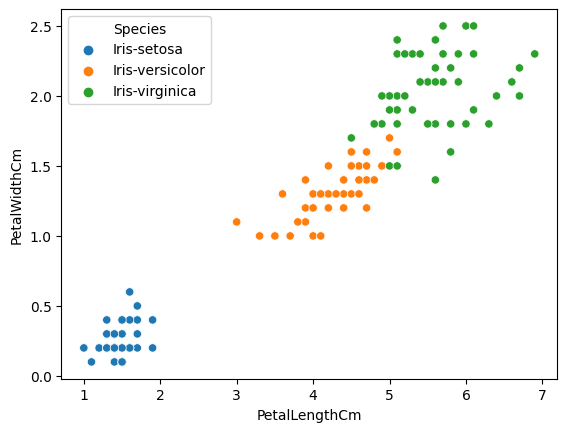

In [103]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


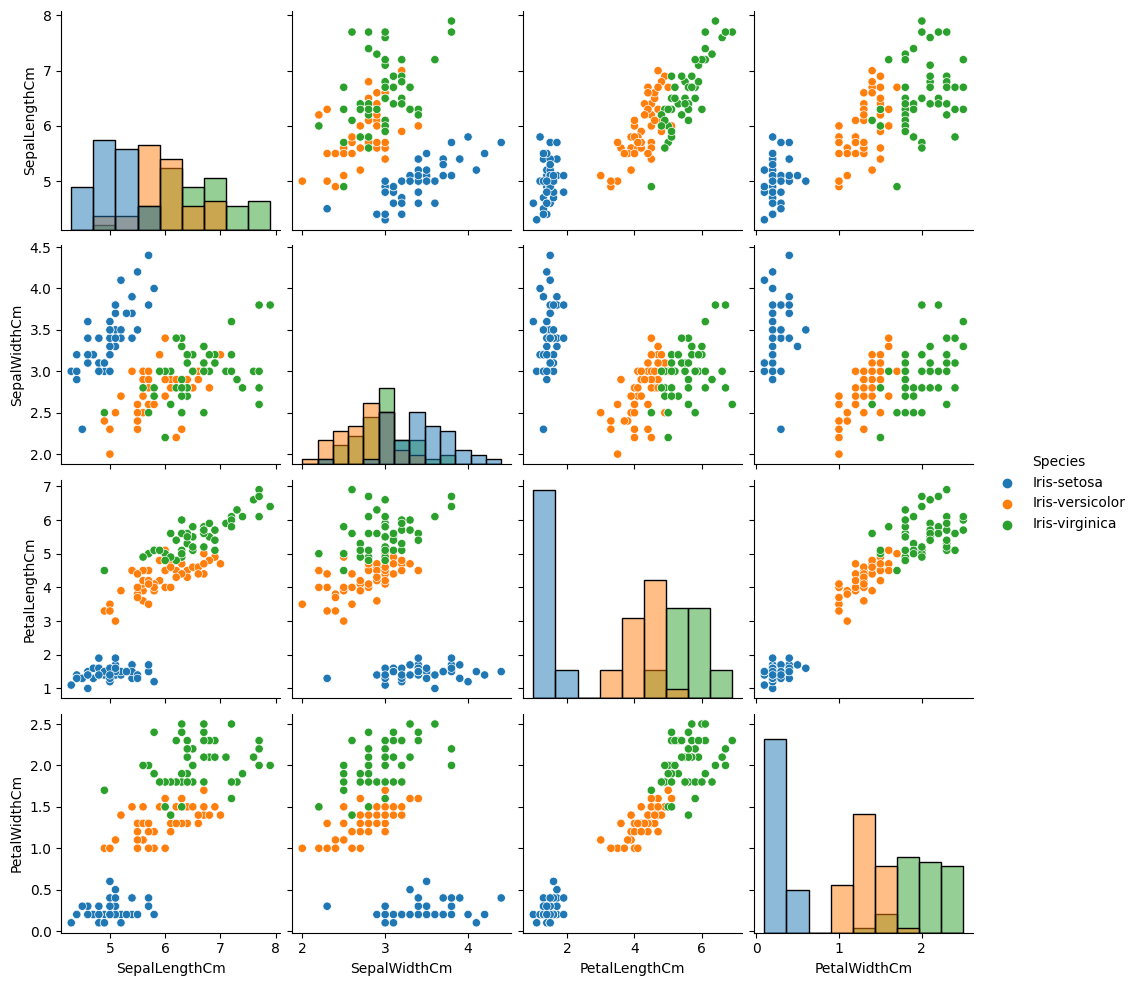

In [106]:
#Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos
df_test = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
sns.pairplot(df_test, hue="Species", diag_kind="hist")

# Correlación entre variables


In [38]:
df_correlation = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','target']]
df_correlation.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


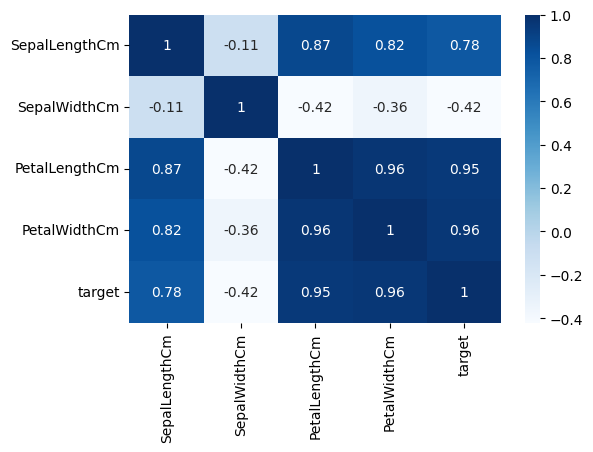

In [39]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);

# Observaciones:
 + Alta correlación positiva entre la longitud del pétalo y su ancho (0,96)
 + Alta correlación positiva entre la longitud de los pétalos y la longitud de los sépalos (0,87)
 + Alta correlación positiva entre el ancho del pétalo y la longitud del sépalo (0,82)

Entonces, se observa correlaciones entre estos atributos principales: Anchura del pétalo, Longitud del pétalo y Longitud del sépalo.

# Conclusiones procedimiento:
    + El dataset es balanceado.
    + Se tienen 4 columnas númericas y 1 columna categoricas, que se convertirá en el target del modelo.
    + Se presenta una fuerte correlación positiva entre el ancho y la longitud de los pétalos.
    + La flor setosa es la más fácil de distinguir debido a sus dimensiones pequeñas.
    + Las especies versicolor y virginica suelen estar mezcladas y a veces son difíciles de separar.
    + Las flores versicolor suelen tener rasgos de dimensión media, mientras que la virginica tienen mayor tamaño.
    + Las dimensiones de los pétalos parecen ser la mejor información para distinguir las especies, lo cual será útil al desarrollar modelos de Machine learning con este dataset.


In [18]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [29]:
# Crear el modelo de árbol de decisión "GINI"
clf = DecisionTreeClassifier()

In [30]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

In [31]:
 # Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.96


In [32]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import sys
!{sys.executable} -m pip install graphviz



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


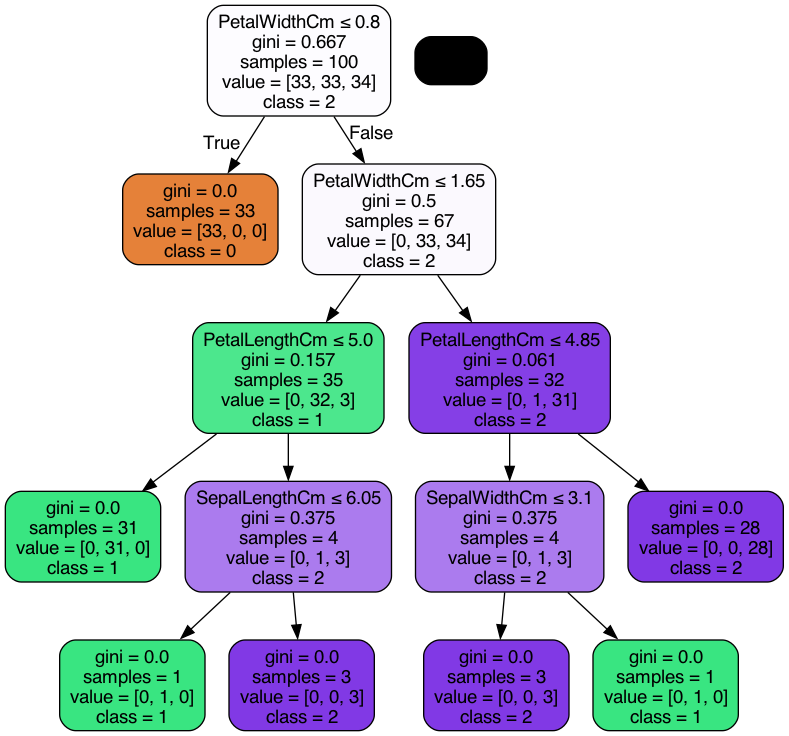

In [33]:
# instalar el compoent graphviz: https://graphviz.gitlab.io/download/
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

In [24]:
# Crear el modelo de árbol de decisión #Entoropia
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)



In [25]:
# Entrenar el modelo
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

In [49]:
 # Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.96


In [50]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import sys
!{sys.executable} -m pip install graphviz


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


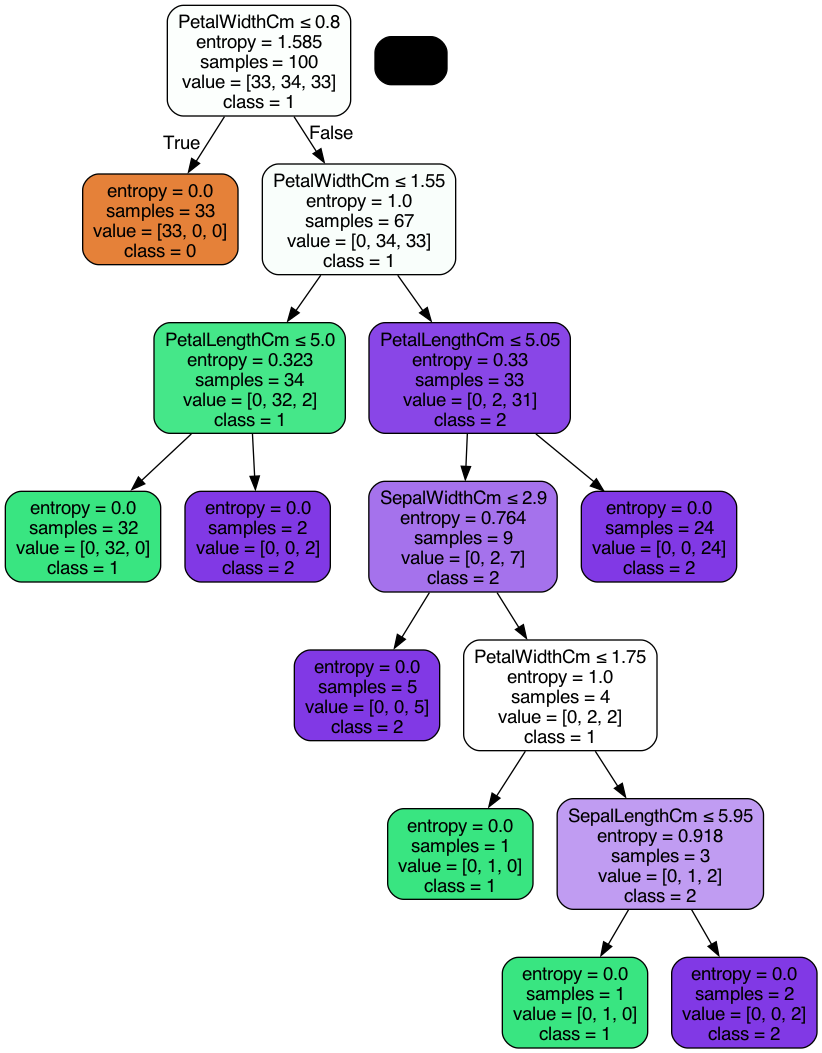

In [51]:
# instalar el compoent graphviz: https://graphviz.gitlab.io/download/
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris_entropy.png')
Image(graph.create_png())